prototyping of the interpolation data generation

In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import random

import tensorflow as tf
import numpy as np
#import cmsisdsp as dsp
import random

#import sys
#sys.path.append('/home/mat/dev/cached_dilated_causal_convolutions/') 

# from cmsisdsp_py_version.block import Block
# from cmsisdsp_py_version.keras_model import create_dilated_model, create_strided_model
# from cmsisdsp_py_version.cached_block_model import CachedBlockModel, Regression
# from cmsisdsp_py_version.rolling_cache import RollingCache


In [9]:
def parse(fname, w0n, w1n, w2n):
    df_w = pd.read_csv(fname, sep=' ', names=['tri', w0n, w1n, w2n])
    df_w['n'] = range(len(df_w))
    df_l = df_w.melt(id_vars='n', value_vars=['tri', w0n, w1n, w2n])
    return df_w, df_l

tsrq_df_w, tsrq_df_l = parse('../datalogger_firmware/tri_sine_ramp_square.ssv', 'sine', 'ramp', 'square')
trqz_df_w, trqz_df_l = parse('../datalogger_firmware/tri_ramp_square_zigzag.ssv', 'ramp', 'square', 'zigzag')
tqzs_df_w, tqzs_df_l = parse('../datalogger_firmware/tri_square_zigzag_sine.ssv', 'square', 'zigzag', 'sine')
tzsr_df_w, tzsr_df_l = parse('../datalogger_firmware/tri_zigzag_sine_ramp.ssv', 'zigzag', 'sine', 'ramp')


/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='n', ylabel='value'>

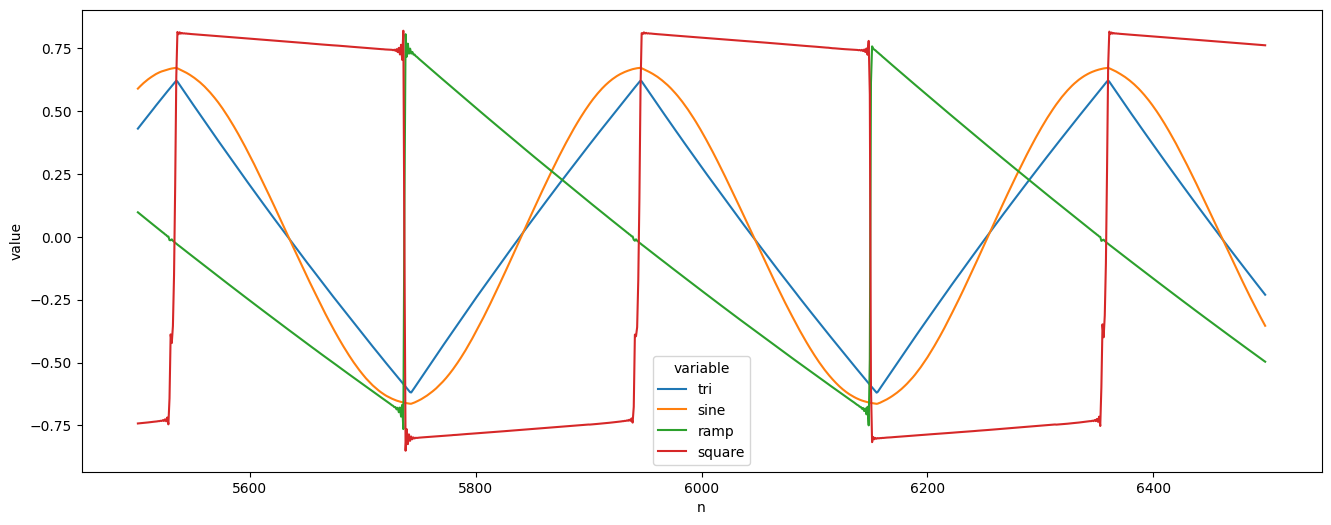

In [10]:
plt.figure(figsize=(16, 6))
offset = 5500
width = 1000
df = tsrq_df_l
window = (df['n']>offset) & (df['n']<offset+width)
sns.lineplot(df[window], x='n', y='value', hue='variable')

/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='n', ylabel='value'>

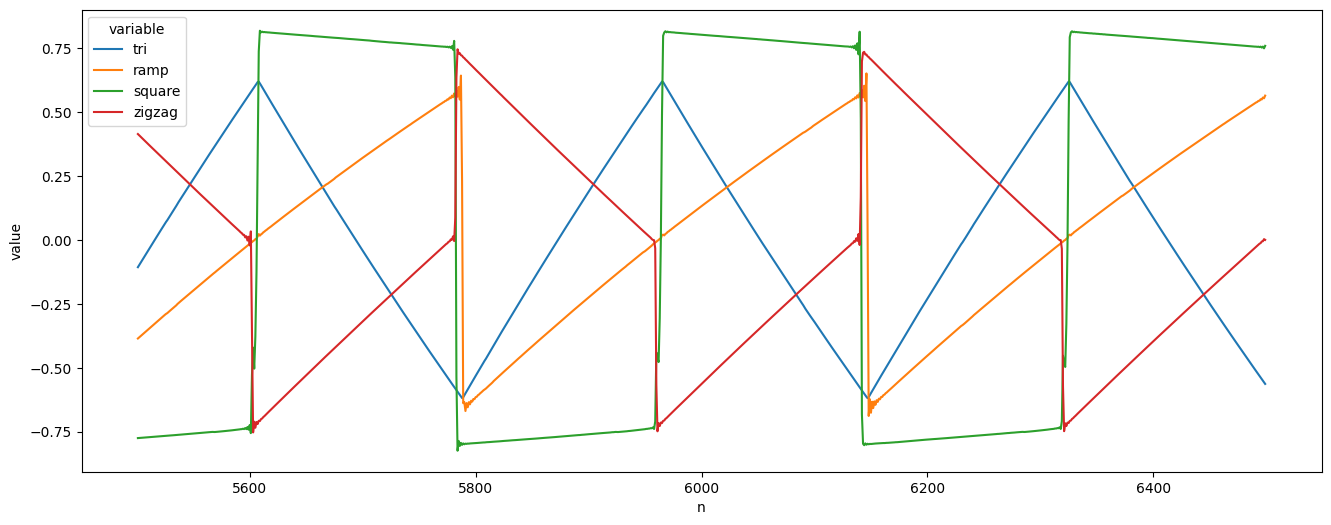

In [11]:
plt.figure(figsize=(16, 6))
offset = 5500
width = 1000
df = trqz_df_l
window = (df['n']>offset) & (df['n']<offset+width)
sns.lineplot(df[window], x='n', y='value', hue='variable')

/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='n', ylabel='value'>

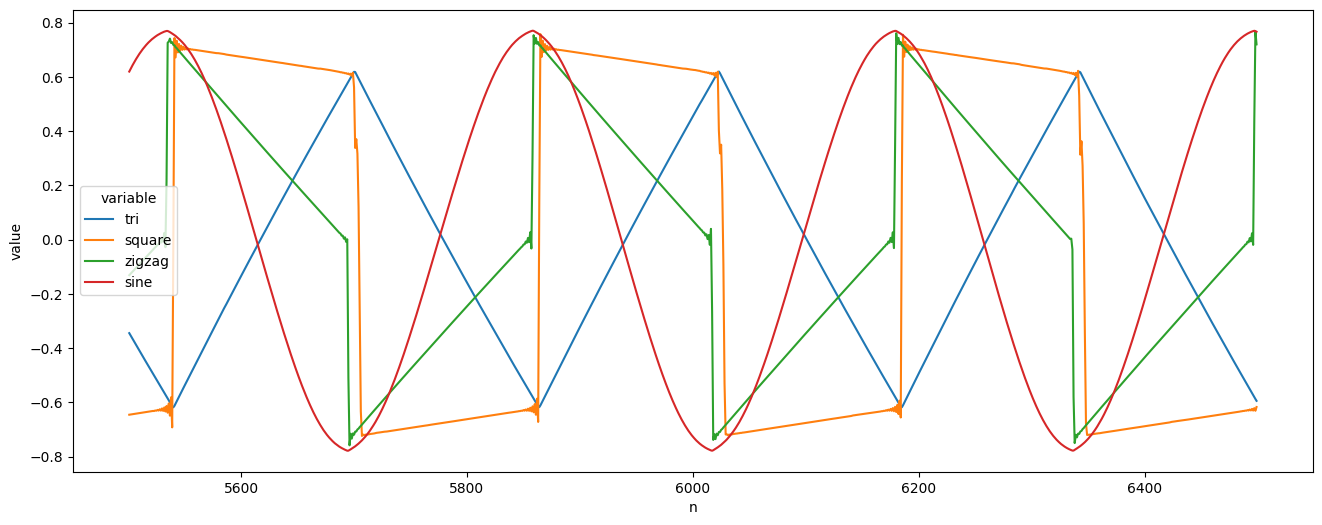

In [12]:
plt.figure(figsize=(16, 6))
offset = 5500
width = 1000
df = trqz_df_l
window = (df['n']>offset) & (df['n']<offset+width)
sns.lineplot(df[window], x='n', y='value', hue='variable')

/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mat/miniconda3/envs/cdcc/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

<Axes: xlabel='n', ylabel='value'>

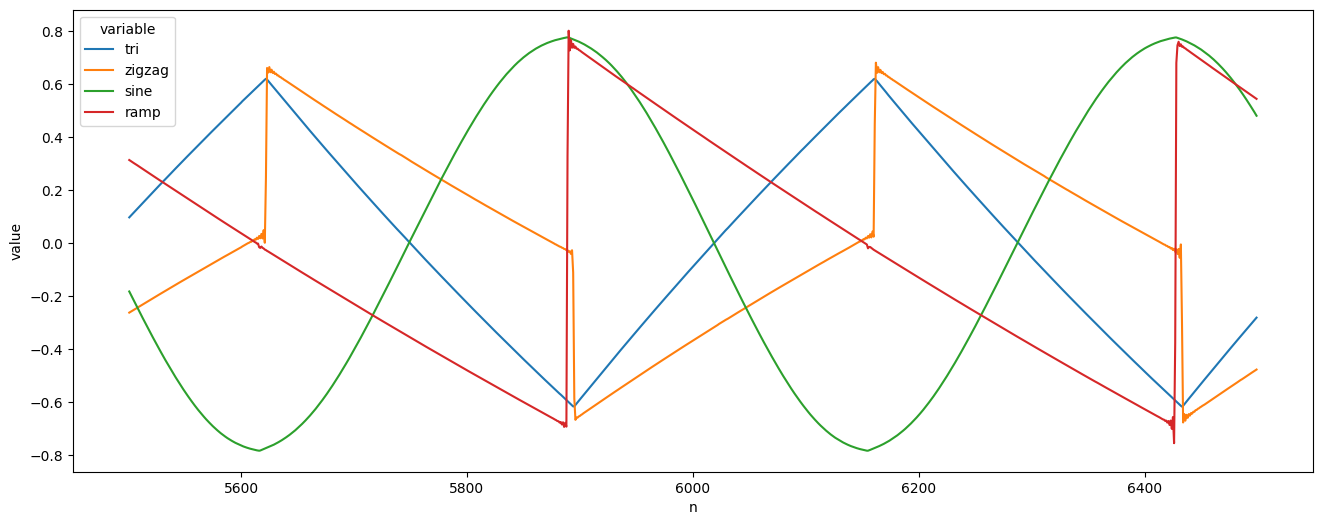

In [245]:
plt.figure(figsize=(16, 6))
offset = 5500
width = 1000
df = tzsr_df_l
window = (df['n']>offset) & (df['n']<offset+width)
sns.lineplot(df[window], x='n', y='value', hue='variable')

now we code picking a random point

In [246]:
tzsr_df_w.head()

,tri,zigzag,sine,ramp,n
0,-0.461798,-0.579501,0.682517,0.649904,0
1,-0.456861,-0.576778,0.678599,0.646928,1
2,-0.451645,-0.573866,0.674337,0.644166,2
3,-0.446541,-0.570986,0.669960,0.640971,3
4,-0.441533,-0.568166,0.665656,0.638038,4


In [30]:
tzsr = tzsr_df_w.to_numpy()
tzsr[:10]

array([[-0.46179773, -0.57950138,  0.68251706,  0.64990426,  0.        ],
       [-0.45686102, -0.57677773,  0.67859936,  0.64692806,  1.        ],
       [-0.4516449 , -0.57386611,  0.67433715,  0.6441655 ,  2.        ],
       [-0.44654106, -0.57098554,  0.66995955,  0.64097069,  3.        ],
       [-0.44153309, -0.56816627,  0.66565632,  0.6380377 ,  4.        ],
       [-0.43638038, -0.56517933,  0.66122534,  0.63515424,  5.        ],
       [-0.43127488, -0.56231117,  0.65642784,  0.63199878,  6.        ],
       [-0.42628694, -0.55951213,  0.65180371,  0.62915066,  7.        ],
       [-0.4212048 , -0.55661344,  0.64700486,  0.62602733,  8.        ],
       [-0.41609146, -0.5537655 ,  0.64212416,  0.6230855 ,  9.        ]])

In [385]:

wave_to_embed_pt = { 
    's': [-1, -1],
    'r': [-1, 1],
    'z': [1, 1],
    'q': [1, -1]
}

def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
    
class WaveData(object):
    
    def __init__(self, waves, df, pad_to_size):
        self.waves = waves
        self.wave_to_column = { name: idx for idx, name in enumerate(waves) } 
        self.df = df
        self.pad_to_size = pad_to_size

    def _random_interpolation_from_sample(self, sample):
        
        interp_waves = self.waves[1:]
        random.shuffle(interp_waves)
#        print("interp_waves", interp_waves)

        # choose alpha for interps
        alpha1 = random.random()
        alpha2 = random.random()
#        print("alphas", alpha1, alpha2)

        # interpolate samples
        # TODO: constant power cross fade would be better here, otherwise we're getting
        #       an amplitude drop
        interp_columns = [self.wave_to_column[w] for w in interp_waves]
#        print("interp_columns", interp_columns)
        interpolated_samples = ( alpha1 * sample[:, interp_columns[0]]) + ((1-alpha1) * sample[:, interp_columns[1]])
        interpolated_samples = ( alpha2 * sample[:, interp_columns[2]]) + ((1-alpha2) * interpolated_samples)
        
        # smooth with rolling average; can have some sharp boundaries
        # note: we need to pad to restore length ( do so with first element )
        N = 10
        interpolated_samples = moving_average(interpolated_samples, n=N)        
        interpolated_samples = np.concatenate([[interpolated_samples[0]] * (N-1), interpolated_samples])
        
        # interpolate the embed points with the same alphas
        embed_pts = [np.array(wave_to_embed_pt[w]) for w in interp_waves]
#        print("interp_pts", interp_pts)
        interpolated_embed_pt = ( alpha1 * embed_pts[0]) + ((1-alpha1) * embed_pts[1])
#        print("interpolated_embed_pt", interpolated_embed_pt)
        interpolated_embed_pt = ( alpha2 * embed_pts[2]) + ((1-alpha2) * interpolated_embed_pt)
#        print("interpolated_embed_pt", interpolated_embed_pt)

        e0 = interpolated_embed_pt[0]  # e0
        e1 = interpolated_embed_pt[1]  # e1
        sy = interpolated_samples     
       
        return e0, e1, sy

    
    def _random_single_wave(self, sample):
        
        random_wave = random.choice(self.waves[1:])
        random_wave_col = self.wave_to_column[random_wave]
        embed_pt = wave_to_embed_pt[random_wave]
                
        e0 = embed_pt[0]   # e0
        e1 = embed_pt[1]   # e1
        sy = sample[:, random_wave_col]        
        
        return e0, e1, sy

    
    def sample(self, random_interpolation, seq_len):
        
        max_offset = len(self.df) - seq_len - 1
        random_offset = random.randint(0, max_offset)
        sample = self.df[random_offset:(random_offset+seq_len)]
        
        if random_interpolation:
            # interpolate randomly between the three waves
            e0, e1, sy = self._random_interpolation_from_sample(sample)            
        else:
            # just pick one of the waves to emit
            e0, e1, sy = self._random_single_wave(sample)

        x = np.zeros((len(sample), self.pad_to_size), dtype=float)
        x[:, 0] = sample[:, 0]
        x[:, 1] = e0
        x[:, 2] = e1
        y = np.zeros((len(sample), self.pad_to_size), dtype=float)  
        y[:, 0] = sy
        
        return x, y        

def parse(fname, w0n, w1n, w2n):
    df_w = pd.read_csv(fname, sep=' ', names=['tri', w0n, w1n, w2n])
    df_w['n'] = range(len(df_w))
    df_l = df_w.melt(id_vars='n', value_vars=['tri', w0n, w1n, w2n])
    return df_w, df_l

tsrq_df_w, tsrq_df_l = parse('../datalogger_firmware/tri_sine_ramp_square.ssv', 'sine', 'ramp', 'square')
trqz_df_w, trqz_df_l = parse('../datalogger_firmware/tri_ramp_square_zigzag.ssv', 'ramp', 'square', 'zigzag')
tqzs_df_w, tqzs_df_l = parse('../datalogger_firmware/tri_square_zigzag_sine.ssv', 'square', 'zigzag', 'sine')
tzsr_df_w, tzsr_df_l = parse('../datalogger_firmware/tri_zigzag_sine_ramp.ssv', 'zigzag', 'sine', 'ramp')

def make_dataset(wave_datas, seq_len):
    
    def gen():
        while True:
            for wd in wave_datas:
                yield wd.sample(random_interpolation=True, seq_len=seq_len)
                yield wd.sample(random_interpolation=False, seq_len=seq_len)
    
    
    return tf.data.Dataset.from_generator(
            gen, output_signature=(tf.TensorSpec(shape=(seq_len, 8), dtype=tf.float32),
                                   tf.TensorSpec(shape=(seq_len, 8), dtype=tf.float32)))    


wave_datas = [
    WaveData(['t', 's', 'r', 'q'], tsrq_df_w.to_numpy(), pad_to_size=8),
    WaveData(['t', 'r', 'q', 'z'], trqz_df_w.to_numpy(), pad_to_size=8),
    WaveData(['t', 'q', 'z', 's'], tqzs_df_w.to_numpy(), pad_to_size=8),
    WaveData(['t', 'z', 's', 'r'], tzsr_df_w.to_numpy(), pad_to_size=8)
]


In [386]:
data = make_dataset(wave_datas, seq_len=1000).batch(20)

for x, y in data:
    print(x.shape, y.shape)
    break

(20, 1000, 8) (20, 1000, 8)


0 tf.Tensor(
[[ 0.3051083  -0.7468089   0.64609194  0.          0.          0.
   0.          0.        ]
 [ 0.30954623 -0.7468089   0.64609194  0.          0.          0.
   0.          0.        ]
 [ 0.31431153 -0.7468089   0.64609194  0.          0.          0.
   0.          0.        ]
 [ 0.31894875 -0.7468089   0.64609194  0.          0.          0.
   0.          0.        ]
 [ 0.32342243 -0.7468089   0.64609194  0.          0.          0.
   0.          0.        ]], shape=(5, 8), dtype=float32)
1 tf.Tensor(
[[ 0.26856065 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.27379584 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.27897477 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.28421974 -1.          1.          0.          0.          0.
   0.          0.        ]
 [ 0.2893591  -1.          1.          0.          0.          0.
   0.          0.        ]], shape=(5, 8

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

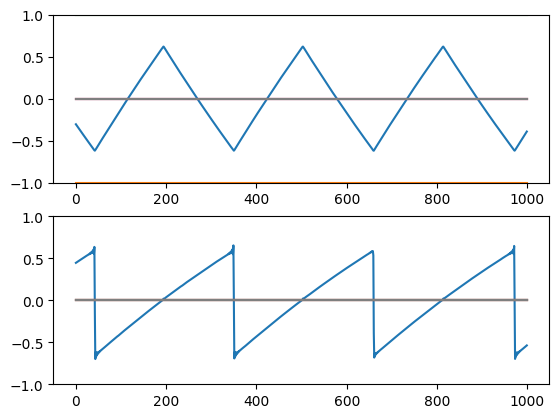

In [389]:
for i in range(len(x)):
    fig.clf()
    fig, (ax1, ax2) = plt.subplots(2)
    print(i, x[i][:5])
    ax1.plot(x[i])
    ax2.plot(y[i])
    ax1.set_ylim((-1, 1))
    ax2.set_ylim((-1, 1))
    plt.savefig(f"foo_{i:03d}.png")



we want to rebuild the dataset from tri, sine, ramp and tri, square, zigzag
to (embed0, embed1, tri) -> one of the other waves


In [260]:
x = [1,2,3,4]

[x[0]]*5 + x

[1, 1, 1, 1, 1, 1, 2, 3, 4]

In [5]:
data = tsr_df_w.to_numpy().astype(np.float32)

tri_to = {}
tri_to['sine'] = {}
tri_to['sine']['x'] = np.empty((len(data), 3), dtype=np.float32)
tri_to['sine']['x'][:,0] = 0  # x2
tri_to['sine']['x'][:,1] = 0  # x3
tri_to['sine']['x'][:,2] = data[:,0] # triangle
tri_to['sine']['y'] = np.expand_dims(data[:,1], -1) # sine

tri_to['ramp'] = {}
tri_to['ramp']['x'] = np.empty((len(data), 3), dtype=np.float32)
tri_to['ramp']['x'][:,0] = 0  # x2
tri_to['ramp']['x'][:,1] = 1  # x3
tri_to['ramp']['x'][:,2] = data[:,0] # triangle
tri_to['ramp']['y'] = np.expand_dims(data[:,2], -1) # ramp

data = tsz_df_w.to_numpy().astype(np.float32)

tri_to['square'] = {}
tri_to['square']['x'] = np.empty((len(data), 3), dtype=np.float32)
tri_to['square']['x'][:,0] = 1  # x2
tri_to['square']['x'][:,1] = 0  # x3
tri_to['square']['x'][:,2] = data[:,0] # triangle
tri_to['square']['y'] = np.expand_dims(data[:,1], -1) # square

tri_to['zigzag'] = {}
tri_to['zigzag']['x'] = np.empty((len(data), 3), dtype=np.float32)
tri_to['zigzag']['x'][:,0] = 1  # x2
tri_to['zigzag']['x'][:,1] = 1  # x3
tri_to['zigzag']['x'][:,2] = data[:,0] # triangle
tri_to['zigzag']['y'] = np.expand_dims(data[:,2], -1) # zigzag


In [6]:
def split_train_val_test(d):
    assert 'x' in d
    assert 'y' in d
    assert len(d['x']) == len(d['y'])
    val_test_split_size = int(len(d['x']) * 0.1)  # 10% for val and test
    d['train'] = {}
    d['validate'] = {}
    d['test'] = {}
    for xy in ['x', 'y']:                
        d['train'][xy] = d[xy][:-2*val_test_split_size]        
        d['validate'][xy] = d[xy][-2*val_test_split_size:-val_test_split_size]        
        d['test'][xy] = d[xy][-val_test_split_size:]
        d.pop(xy)

for wave in ['sine', 'ramp', 'square', 'zigzag']:
    split_train_val_test(tri_to[wave])

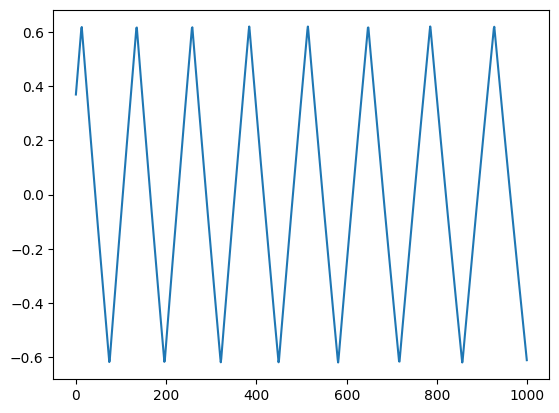

In [7]:
plt.plot(data[:,0][1000:2000])

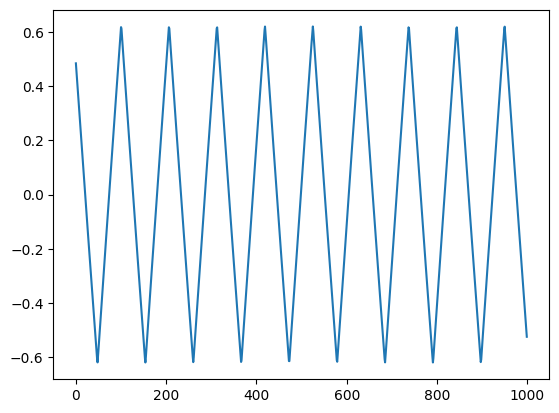

In [8]:
plt.plot(tri_to['ramp']['train']['x'][:,2][1000:2000])

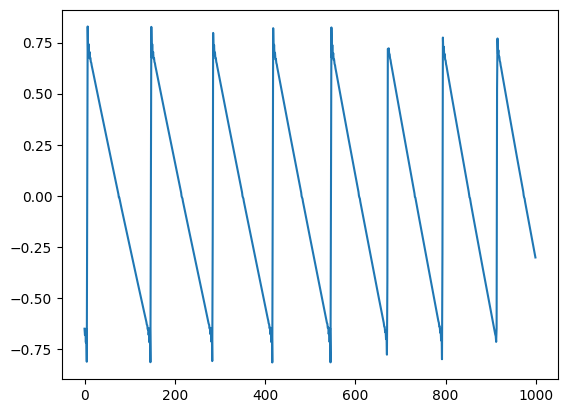

In [9]:
plt.plot(tri_to['ramp']['validate']['y'][1000:2000])

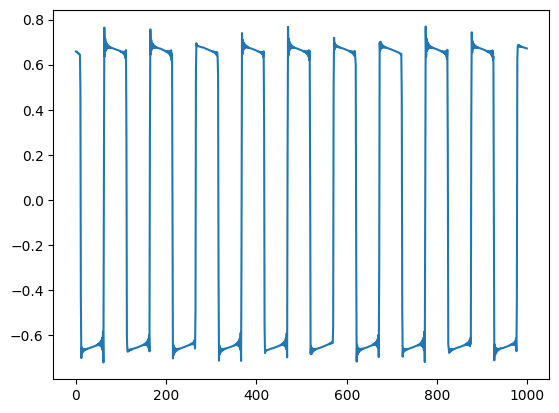

In [10]:
plt.plot(tri_to['square']['test']['y'][1000:2000])

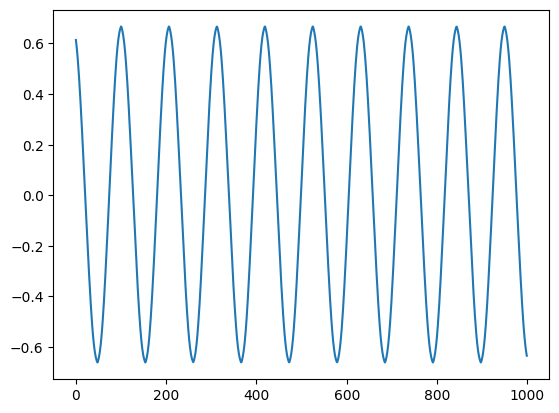

In [11]:
plt.plot(tri_to['sine']['train']['y'][1000:2000])

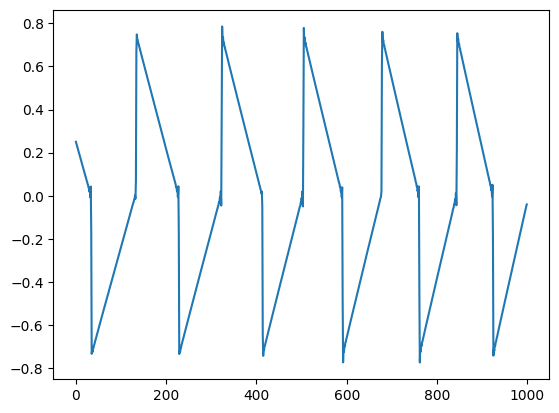

In [12]:
plt.plot(tri_to['zigzag']['validate']['y'][1000:2000])

In [13]:
IN_D = 3    # 2d embedding, (0,1) and core triangle
OUT_D = 1   # output wave

# kernel size and implied dilation rate
K = 4                

# filters for Nth layer Kx1 and 1x1 convs
# [4, 3, 8, 8] @ 32kHz => 72%
# [4, 8, 8, 8] @ 32kHz => 82%
# [4, 8, 8, 12] @ 32kHz => 93%
# [8, 8, 8, 8] @ 32kHz => TOO MUCH
# [4, 4, 4] @ 96kHz => too much :/
# [2, 2, 4] @ 96kHz => too much :/
# [2, 2, 2] @ 96kHz => too much :/

FILTER_SIZES = [4, 4, 4, 4]

RECEPTIVE_FIELD_SIZE = K**len(FILTER_SIZES)

TEST_SEQ_LEN = RECEPTIVE_FIELD_SIZE
TRAIN_SEQ_LEN = RECEPTIVE_FIELD_SIZE * 5

print("RECEPTIVE_FIELD_SIZE", RECEPTIVE_FIELD_SIZE)
print("TRAIN_SEQ_LEN", TRAIN_SEQ_LEN)
print("TEST_SEQ_LEN", TEST_SEQ_LEN)

RECEPTIVE_FIELD_SIZE 256
TRAIN_SEQ_LEN 1280
TEST_SEQ_LEN 256


In [15]:
from tensorflow.keras.optimizers import Adam

def masked_mse(y_true, y_pred):    
    assert len(y_true.shape) == 3, "expected (batch, sequence_length, output_dim)"
    assert y_true.shape == y_pred.shape
    
    # average over elements of y
    mse = tf.reduce_mean(tf.square(y_true - y_pred), axis=-1)  
    
    # we want to ignore the first RECEPTIVE_FIELD_SIZE elements of the loss since they 
    # have been fed with left padded data
    mse = mse[:,RECEPTIVE_FIELD_SIZE:]     

    # return average over batch and sequence
    return tf.reduce_mean(mse)
    
def dataset_from(x, y, s):
    def gen():
        idxs = list(range(len(x)-TRAIN_SEQ_LEN-1))  # ~1.3M
        random.Random(1337).shuffle(idxs)
        if s == 'train':            
            idxs = idxs[:20_000]   # 200_000
        else:
            idxs = idxs[:500]   # 5_000
        for i in idxs:
            yield x[i:i+TRAIN_SEQ_LEN], y[i+1:i+1+TRAIN_SEQ_LEN]
                
    ds = tf.data.Dataset.from_generator(
        gen, output_signature=(tf.TensorSpec(shape=(TRAIN_SEQ_LEN, IN_D), dtype=tf.float32),
                               tf.TensorSpec(shape=(TRAIN_SEQ_LEN, OUT_D), dtype=tf.float32)))
    return ds

def datasets_for_split(s):
    return  [
        dataset_from(tri_to[wave][s]['x'], tri_to[wave][s]['y'], s) #.cache() #filename=f"tf_data_cache_{wave}")
        for wave in ['sine', 'ramp', 'square', 'zigzag']  
    ] 
    
train_ds = tf.data.Dataset.sample_from_datasets(datasets_for_split('train'))
train_ds = train_ds.batch(128).prefetch(tf.data.AUTOTUNE)

validate_ds = tf.data.Dataset.sample_from_datasets(datasets_for_split('validate'))
validate_ds = validate_ds.batch(128).prefetch(tf.data.AUTOTUNE)